# TASK 2
# "Create a K-means clustering algorithm to group customers of a retail store based on their purchase history."

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(r'/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_features_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

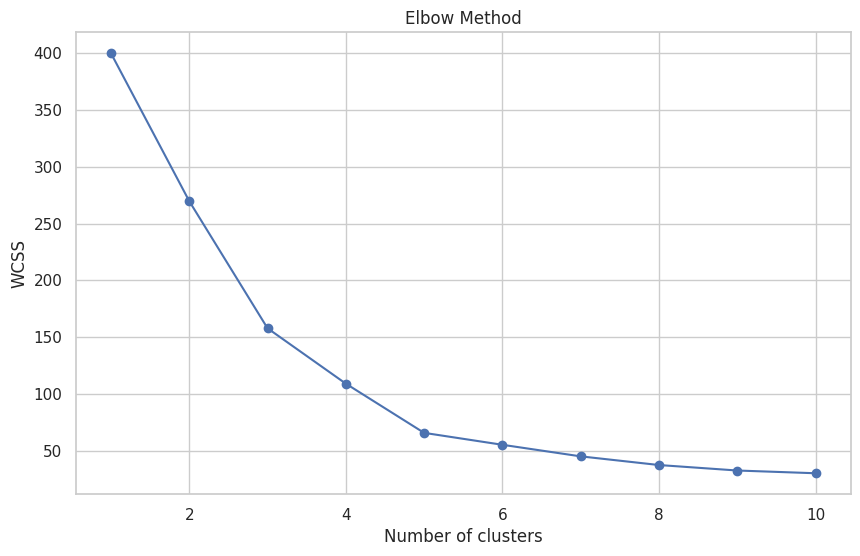

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply K-means with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)



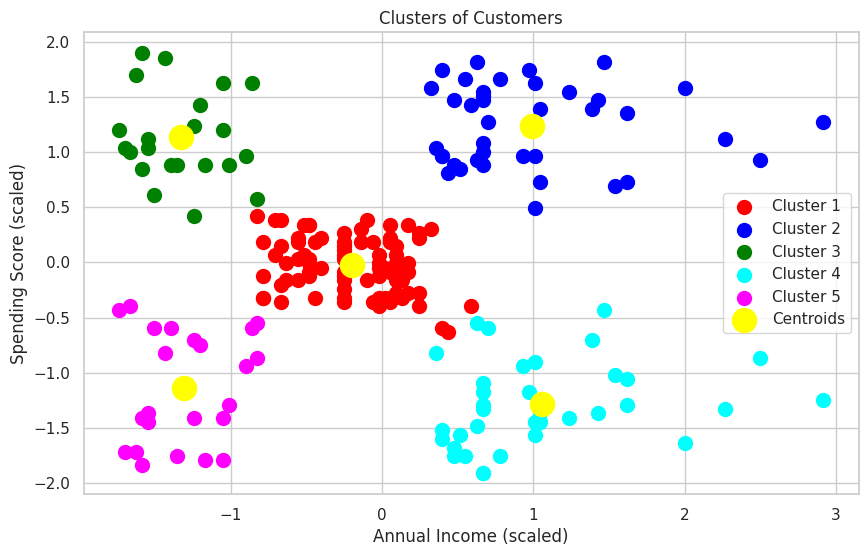

In [ ]:
# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[clusters == 0, 0], scaled_features[clusters == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_features[clusters == 1, 0], scaled_features[clusters == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_features[clusters == 2, 0], scaled_features[clusters == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_features[clusters == 3, 0], scaled_features[clusters == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(scaled_features[clusters == 4, 0], scaled_features[clusters == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [ ]:
# Predict the cluster for a new customer
import numpy as np
new_customer = np.array([[1000, 40]])  # Example: Annual Income = 70k$, Spending Score = 40
scaled_new_customer = scaler.transform(new_customer)
predicted_cluster = kmeans.predict(scaled_new_customer)

print(f'The new customer belongs to cluster: {predicted_cluster[0]}')


The new customer belongs to cluster: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
